# Project Title: Exploring and Analyzing Movie Data


# Project Description:
   

Microsoft wanted to create a new movie studio, but they don't know anything about creating movies. So exploring and analyzing movie data to find what types of films are currently doing the best at the box office and come up with recommendations for business.

# Data:

 Data from zippeddata folder

To analyze the data, importing  the required libraries and function to read the files

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#create a function to read the files
def read_files(path):
    df=pd.read_csv(path)
    return df

# When is the best time of year to release a movie?

Loading data file 'tn.movie_budgets.csv.gz'to a dataframe, this file consists data about movies date of release,movie title, production budget, domestic gross and worldwide gross. Through this data we can analyze how did the movie performed in the box office and group them by month they released to find out profitable month to release.



In [3]:
#loading data to dataframe using read_files function
movie_budget_df =read_files('zippedData/tn.movie_budgets.csv.gz')

In [4]:
#print the first 2 rows in the dataframe
movie_budget_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [5]:
# Print the number of rows and columns in df
movie_budget_df.shape

(5782, 6)

In [6]:
# summary of the dataframe.
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Function to convert object to int type and also eliminate commas and "$" symbol using string replace(). 

In [7]:
#fuction to convert object to int
def convert_col_to_int(df, col):
    df[col]= df[col].str.replace("$","").str.replace("," , ""). astype('int64')
    return df

Converting the production_budget, domestic_gross and worldwide_gross object 
type to int and eliminating commas and "$" using the function convert_col_to_int.

In [8]:
#calling the fuction to convert
cols_to_convert = ['production_budget','domestic_gross', 'worldwide_gross']
for col in cols_to_convert :
    movie_budget_df = convert_col_to_int(movie_budget_df, col)

In [9]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [10]:
movie_budget_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

We have checked the dataframe and any null values. Now we will look into actual
question, we need anew column which shows the profit or loss of the movie.

In [11]:
#finding out the profit/loss of the movie and adding column difference to dataframe
movie_budget_df['profit/loss'] = movie_budget_df['worldwide_gross'] - movie_budget_df['production_budget']

In [12]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit/loss
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


we are adding a new column month to dataframe,so we can check which month is movie released. 

In [13]:
#adding column month to dataframe
movie_budget_df['release_month']=pd.to_datetime(movie_budget_df
                         ['release_date']).dt.month

In [14]:
#checking the dataframe after the update
movie_budget_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit/loss,release_month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5


In [15]:
#checking for the nullvalues
movie_budget_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
profit/loss          0
release_month        0
dtype: int64

Grouping the dataframe by month in which the movies were released and totaling the colummns  so we can know which month was more profitable to release the movie.

In [16]:
#Grouping the dataframe by release_month and finding the total profit in each month
profit_by_month_df = movie_budget_df.groupby(by=['release_month']).sum()

In [17]:
#reseting the index
profit_by_month_df= profit_by_month_df.reset_index()

In [18]:
profit_by_month_df

,release_month,id,production_budget,domestic_gross,worldwide_gross,profit/loss
0,1,17371,7232691000,8310517342,16157646936,8924955936
1,2,19855,10994196247,13882543926,28045454121,17051257874
2,3,23461,14467577021,18129303397,37897684431,23430107410
3,4,23209,10806485000,12407092932,27203797390,16397312390
4,5,20576,19184024596,27146065077,66043077615,46859053019
5,6,23999,20644478311,31531570976,68268531657,47624053346
6,7,22046,18720308775,26720337439,62023990453,43303681678
7,8,26028,12675822719,15955429870,30245291880,17569469161
8,9,23905,10753760847,11412894262,23019987786,12266226939
9,10,28645,11684993000,13994662807,28343193867,16658200867


Plotting the bar graph using seaborn to visualize the data which month is more profitable to releae the movie.

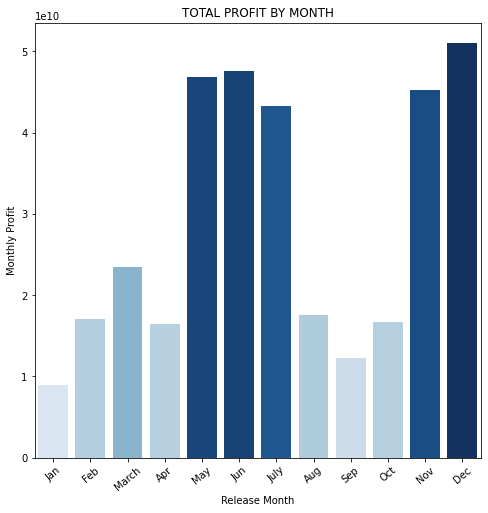

In [19]:
#Plotting the graph
name = pd.DataFrame({'release_month': ['Jan', 'Feb', 'March','Apr','May',
                                       'Jun','July','Aug','Sep','Oct','Nov','Dec'],
                     'var': [1,2,3,4,5,6,7,8,9,10,11,12]})
plt.figure(figsize=(8,8))
norm = plt.Normalize(0,profit_by_month_df['profit/loss'].values.max())
colors = plt.cm.Blues(norm(profit_by_month_df['profit/loss']))
fig = sns.barplot(x = 'release_month', y = profit_by_month_df['profit/loss'], 
                  data=name, palette=colors)
plt.xlabel("Release Month")
plt.ylabel("Monthly Profit")
plt.title("TOTAL PROFIT BY MONTH") 
plt.xticks(rotation=40)
plt.show(fig)

Conclusion: The top 3 months to release the movie are December,June and May for
better profits.


#  Which Studios have the most profitable films?

Loading data file 'bom.movie_gross.csv.gz'to a dataframe, this file consists 
movie title,studio, year,domestic gross, and foreign gross. Through this data
we can analyze the best performed movies and studios.
.

In [20]:
#loading the movie.gross.csv.gz file from zippedData to dataframe
movie_gross_df= pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [21]:
#print the first 5 rows in the dataframe
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [22]:
# Print the number of rows and columns in df
movie_gross_df.shape

(3387, 5)

In [23]:
# checking for nullvalues
movie_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

After checking the null values in the dataframe, domestic_gross have less than
1% missing data, so decided to drop those rows.

In [24]:
#dropping the null on domestic_gross column
movie_gross_df = movie_gross_df.dropna(subset=['domestic_gross'])

In [25]:
movie_gross_df.isna().sum()

title                0
studio               3
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

Sorting the data based on domestic gross in descending order to find out
top 10 movies and plot the graph using seaborn

In [26]:
#sorting dataframe by domestic_gross
movie_gross_df.sort_values(by=['domestic_gross'], ascending = False)
movie_gross_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


Text(0.5, 1.0, 'Top 10 Most Profitable movies')

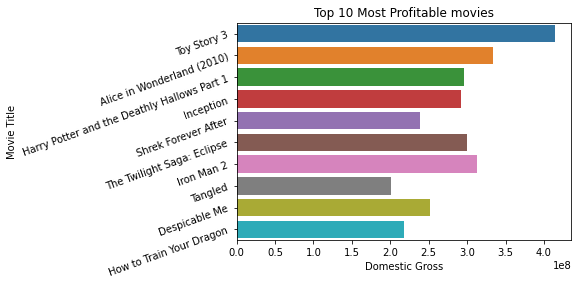

In [27]:
#plotting top 10 domestic profitable movies
sns.barplot(x='domestic_gross', y= 'title', 
             data=movie_gross_df.head(10))
plt.xlabel("Domestic Gross")
plt.ylabel("Movie Title")
plt.yticks(rotation=20)
plt.title("Top 10 Most Profitable movies")

Conclusion: The most profitable is Toy Story 3.

 Noticed top 9 out of 10 are from same studio, so grouping dataframe by studio
 and assigning to new dataframe.

In [28]:
# grouping dataframe by studio and assigning to new dataframe
top_studios_df = movie_gross_df.groupby(by ='studio').sum()

In [29]:
top_studios_df = top_studios_df.reset_index()

In [30]:
#  sorting dataframe by total domestic gross
top_studios_df.sort_values(by =['domestic_gross'], inplace= True, ascending = False)

Text(0.5, 1.0, 'Top 10 Most Profitable Studios')

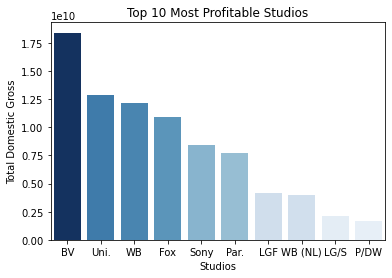

In [31]:
# plotting top 10 studios 
norm = plt.Normalize(0,top_studios_df ['domestic_gross'].values.max())
colors = plt.cm.Blues(norm(top_studios_df['domestic_gross']))
sns.barplot(x='studio', y ='domestic_gross', data = top_studios_df[0:10], palette =colors)
plt.xlabel("Studios")
plt.ylabel("Total Domestic Gross")
plt.title("Top 10 Most Profitable Studios")

Conclusion:These are top 3 studios( Buena Vista(BV), Universal(Uni) 
and Warner Brothers(WB)) has more domestic revenue.

# How does rating of the movie affects on other factors?

Analyzing movie data to figure out the top rated movies we need data from 
title_rating and title_basics files. By merging these dataframe and sorting
them by rating and find the top rated movies.

In [32]:
# Loading the title basic to dataframe
title_basics_df = read_files('zippedData/imdb.title.basics.csv.gz')

In [33]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [34]:
#checking the structure of dataframe
title_basics_df.shape

(146144, 6)

In [35]:
#loading the imdb.title.ratings file to dataframe
title_rating_df= read_files('zippedData/imdb.title.ratings.csv.gz')

In [36]:
title_rating_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [37]:
#checking the structure of dataframe
title_rating_df.shape

(73856, 3)

In [38]:
#checking for nullvalues
title_rating_df.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

Merging dataframes on columns 'tconst' to get movie title,rating 
and assigning to a new dataframe. Performing left merge because title_rating_df
have less records when compare with title_basic_df to avoid the missing data.

In [39]:
#merging dataframes to get movie title and rating and assigning to a new dataframe
movie_rating_df = pd.merge(title_rating_df, title_basics_df, on ="tconst", how = "left")

In [40]:
#checking the structure of dataframe
movie_rating_df.shape

(73856, 8)

In [41]:
#checking for null values
movie_rating_df.isna().sum()

tconst                0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

In [42]:
movie_rating_df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


Sorting the data on averagerating and plotting data using seaborn to visialize.

In [43]:
movie_rating_df.sort_values(by=['averagerating'], inplace = True , ascending = False)

In [44]:
movie_rating_df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
27644,tt8730716,10.0,5,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary
8992,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary"
26153,tt2632430,10.0,5,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
65033,tt9715646,10.0,20,Renegade,Renegade,2019,NaN,Documentary
57679,tt5344358,10.0,6,All Around Us,All Around Us,2019,NaN,Documentary


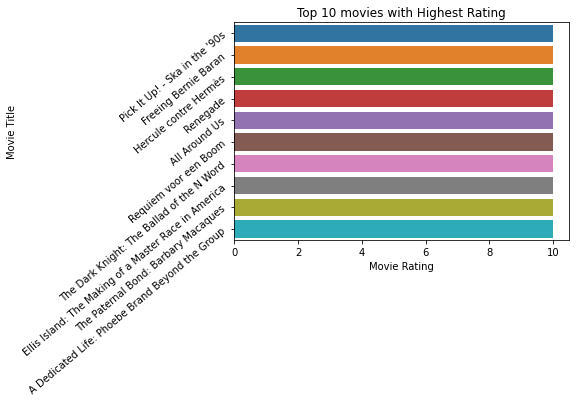

In [45]:
# plotting top 10 rated movies

sns.barplot(y='primary_title', x='averagerating', data = movie_rating_df[0:10])

plt.title("Top 10 movies with Highest Rating")
plt.xlabel("Movie Rating")
plt.ylabel("Movie Title")

plt.yticks(rotation=40)
plt.show(fig)

 Noticed more then 10 movies have a averagerating 10, to investigate further grouped the dataframe by averagerating  and counted them assigned to a new dataframe. Sorted the dataframe by averagerating and plotted a line graph.  

In [46]:
movie_gp_rating_df = movie_rating_df.groupby(by=['averagerating']).count().reset_index()

In [47]:
movie_gp_rating_df.sort_values(by=['averagerating'], ascending = False, inplace= True)

In [48]:
movie_gp_rating_df.head()

,averagerating,tconst,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
90,10.0,16,16,16,16,16,13,16
89,9.9,5,5,5,5,5,5,5
88,9.8,15,15,15,15,15,11,15
87,9.7,12,12,12,12,12,11,12
86,9.6,18,18,18,18,18,15,18


Text(0, 0.5, 'Number of Movies')

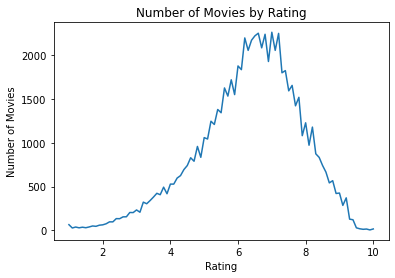

In [49]:
#plotting a line graph
sns.lineplot(x='averagerating', y= 'tconst', data= movie_gp_rating_df.head(100))
plt.title("Number of Movies by Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")

Observation from the line graph is most of movies are rated 6-7. 
Further investigate how rating of the movie affect the profit/loss,by merging the
movie_rating to movie_budget dataframe 

In [50]:
#merging the dataframes to check the rating and movie budgets
rating_profit_df= pd.merge( movie_rating_df, movie_budget_df, left_on= ['primary_title'] , 
                           right_on= ['movie'], how= "inner")

In [51]:
rating_profit_df.shape

(2875, 16)

In [52]:
rating_profit_df.isna().sum()

tconst                 0
averagerating          0
numvotes               0
primary_title          0
original_title         0
start_year             0
runtime_minutes      118
genres                 8
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
profit/loss            0
release_month          0
dtype: int64

In [53]:
#dropping the columns
rating_profit_df.drop(columns = ['tconst', 'primary_title','original_title','id' , 
                               'release_month'], axis=1, inplace= True)

In [54]:
rating_profit_df.shape

(2875, 11)

In [55]:
rating_profit_df.head()

,averagerating,numvotes,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit/loss
0,9.3,22,2018,NaN,Documentary,"Feb 15, 2002",Crossroads,12000000,37188667,57000000,45000000
1,9.3,22,2018,NaN,Documentary,"Jun 23, 2015",Crossroads,500000,0,0,-500000
2,8.7,15,2014,65.0,Documentary,"Feb 15, 2002",Crossroads,12000000,37188667,57000000,45000000
3,8.7,15,2014,65.0,Documentary,"Jun 23, 2015",Crossroads,500000,0,0,-500000
4,7.8,8,2015,87.0,"Action,Crime,Drama","Feb 15, 2002",Crossroads,12000000,37188667,57000000,45000000


Noticed duplicate entries in rating_profit_df with columns movie and release date.
To eliminate duplicates values need to drop them from dataframe.

In [56]:
#eliminating the duplicates entries
rating_profit_df.drop_duplicates(subset=['release_date','movie'])

,averagerating,numvotes,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit/loss
0,9.3,22,2018,NaN,Documentary,"Feb 15, 2002",Crossroads,12000000,37188667,57000000,45000000
1,9.3,22,2018,NaN,Documentary,"Jun 23, 2015",Crossroads,500000,0,0,-500000
12,9.2,8,2010,78.0,Documentary,"May 12, 2017",The Wall,3000000,1803064,4495262,1495262
16,9.2,47,2019,108.0,Adventure,"Mar 19, 2010",The Runaways,9500000,3573673,5278632,-4221368
18,9.2,64,2014,110.0,Documentary,"Dec 27, 2000",Traffic,48000000,124107476,208300000,160300000
...,...,...,...,...,...,...,...,...,...,...,...
2870,2.3,179,2011,77.0,Horror,"Aug 26, 1948",Red River,3000000,9012000,9012000,6012000
2871,2.2,679,2012,83.0,Horror,"Mar 20, 2012",Snow White: A Deadly Summer,1000000,0,0,-1000000
2872,2.1,3878,2014,110.0,"Drama,History,Sport","Jun 5, 2015",United Passions,30000000,918,168832,-29831168
2873,1.9,8248,2012,91.0,"Action,Animation,Comedy","Dec 31, 2012",Foodfight!,45000000,0,73706,-44926294


To Analyze the correlation between the rating,budget,profit/loss,runtime,
start year and number votes. Creating new database and assigning those columns.
Plotting a seaborn heatmap to visualize correlation of those columns.


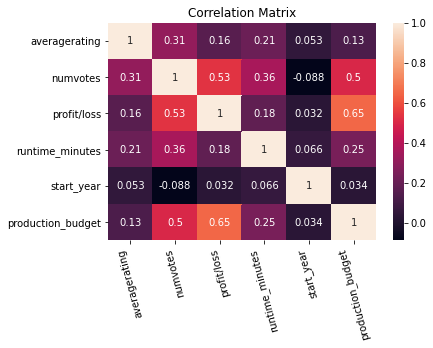

In [57]:
#creating a new dataframe
cor_rating_profit_df= pd.DataFrame(rating_profit_df, columns=['averagerating', 
                                  'numvotes','profit/loss','runtime_minutes',
                                  'start_year','production_budget'])
#plotting a correlation map
sns.heatmap(cor_rating_profit_df.corr(), annot=True)
plt.xticks(rotation= 105)
plt.title("Correlation Matrix")
plt.show()

Conclusions: 

1. averagerating Vs profit/loss both have  0.16 correlation between them.
Means there is a low possibility that movies with higher average ratings have
 higher profits.
2. Production_budget Vs profit both have  0.65 correlation between them. 
Means there is a good possibility that movies with higher investments result 
in better revenue.
3. Start_year Vs num votes have a negative(-0.088) correlation. 
Means that movie rating (num votes) do not depend on the release year.